In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf

In [3]:
apple=yf.download('AAPL','2018-01-01','2022-01-01')
apple

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615887,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608818,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797432,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261936,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108673,82271200
...,...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,177.824432,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,176.798889,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,176.887665,62348900


In [4]:
tnx=yf.download('^TNX','2018-01-01','2022-01-01')
tnx

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,2.433,2.480,2.425,2.465,2.465,0
2018-01-03,2.451,2.465,2.440,2.447,2.447,0
2018-01-04,2.473,2.487,2.449,2.453,2.453,0
2018-01-05,2.465,2.480,2.436,2.476,2.476,0
2018-01-08,2.471,2.489,2.462,2.480,2.480,0
...,...,...,...,...,...,...
2021-12-27,1.489,1.494,1.476,1.481,1.481,0
2021-12-28,1.486,1.489,1.455,1.481,1.481,0
2021-12-29,1.505,1.558,1.505,1.543,1.543,0


In [19]:
def strategy(data):
    data['ema_12'] = data.Close.ewm(span=12, min_periods=1, adjust=False).mean()
    data['ema_26'] = data.Close.ewm(span=26, min_periods=1, adjust=False).mean()
    macd_line = data['ema_12'] - data['ema_26']
    signal_line = macd_line.ewm(span=9, min_periods=1, adjust=False).mean()
    signals = []
    for i in range(len(data)):
        if signal_line[i] > macd_line[i] and signal_line[i-1] <= macd_line[i-1]:
            signals.append(1)
        elif signal_line[i] < macd_line[i] and signal_line[i-1] >= macd_line[i-1]:
            signals.append(-1)
        else:
            signals.append(0)  # No crossover, no action
    data['signals'] = signals
    return data

In [20]:
apple=strategy(apple)
apple

,Open,High,Low,Close,Adj Close,Volume,ema_12,ema_26,signals,portfolio value
Date,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615887,102223600,43.064999,43.064999,0,1.000000e+06
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608818,118071600,43.063845,43.064443,1,1.000000e+06
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797432,89738400,43.093638,43.078744,-1,1.004645e+06
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261936,94640000,43.194617,43.128466,0,1.004645e+06
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108673,82271200,43.255060,43.162469,0,1.004645e+06
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,177.824432,74919600,173.951370,168.900161,0,1.244895e+06
2021-12-28,180.160004,181.330002,178.529999,179.289993,176.798889,79144300,174.772697,169.669778,0,1.237716e+06
2021-12-29,179.330002,180.630005,178.139999,179.380005,176.887665,62348900,175.481514,170.389054,0,1.238337e+06


In [36]:
def backtest_1(data,stop_loss_percent=0.1):
    current=0 #what position you are having
    capital=1000000
    entry=[]
    exit=[]
    number_of_stock=0
    type_of_trade=[]
    duration=[]
    win=0
    stop_loss=0
    loss=0
    count_stop_loss=0
    current_maxima=0
    portfolio_value=[] #total capital-> non investment+ investment
    pl=[] # profit and loss
    for i in range(len(data)-1):
        if(current==1):
            if(data.signals[i]==1 or data.signals[i]==0):
#                 print("Hello")
                capital=capital+(number_of_stock*data.Close[i])
                portfolio_value.append(capital)
                if(capital<=stop_loss):
                    count_stop_loss=count_stop_loss+1
                    exit.append(i)
                    current=0
                    duration.append(exit[-1]-entry[-1])
                    x=portfolio_value[exit[-1]]-portfolio_value[entry[-1]]
                    pl.append(x)
                    number_of_stock=0
                    if(x>0):
                        win=win+1
                    elif(x<0):
                        loss=loss+1
                elif(capital>current_maxima):
                    current_maxima=capital
                    stop_loss=(1-stop_loss_percent)*current_maxima
                capital=capital-number_of_stock*data.Close[i]
            elif(data.signals[i]==-1):
                capital=capital+(number_of_stock*data.Close[i])
                portfolio_value.append(capital)
                exit.append(i)
                current=0
                duration.append(exit[-1]-entry[-1])
                x=portfolio_value[exit[-1]]-portfolio_value[entry[-1]]
                pl.append(x)
                if(x>0):
                    win=win+1
                elif(x<0):
                    loss=loss+1
                
                
        elif(current==-1):
            if(data.signals[i]==-1 or data.signals[i]==0):
                capital=capital-(number_of_stock*data.Close[i])
                portfolio_value.append(capital)
                if(capital<=stop_loss):
                    count_stop_loss=count_stop_loss+1
                    exit.append(i)
                    current=0
                    duration.append(exit[-1]-entry[-1])
                    x=portfolio_value[exit[-1]]-portfolio_value[entry[-1]]
                    pl.append(x)
                    number_of_stock=0
                    if(x>0):
                        win=win+1
                    elif(x<0):
                        loss=loss+1
                elif(capital>current_maxima):
                    current_maxima=capital
                    stop_loss=(1-stop_loss_percent)*current_maxima
                capital=capital+number_of_stock*data.Close[i]
                
            elif(data.signals[i]==1):
                capital=capital-(number_of_stock*data.Close[i])
                portfolio_value.append(capital)
                exit.append(i)
                current=0
                duration.append(exit[-1]-entry[-1])
                x=portfolio_value[exit[-1]]-portfolio_value[entry[-1]]
                pl.append(x)
                if(x>0):
                    win=win+1
                elif(x<0):
                    loss=loss+1
            
        else:
            if(data.signals[i]==1):
#                 print("Hello")
                current=1
                stop_loss=(1-stop_loss_percent)*capital
                current_maxima=capital
                number_of_stock=int(capital/data.Close[i])
                portfolio_value.append(capital)
                capital=capital-number_of_stock*data.Close[i]
                entry.append(i)
                type_of_trade.append("long")
            elif(data.signals[i]==-1):
                current=-1
                stop_loss=(1-stop_loss_percent)*capital
                number_of_stock=int(capital/data.Close[i])
                portfolio_value.append(capital)
                capital=capital+number_of_stock*data.Close[i]
                entry.append(i)
                type_of_trade.append("short")
            else:
                portfolio_value.append(capital)
    if(current==1):
        capital=capital+(number_of_stock*data.Close[i])
        portfolio_value.append(capital)
        exit.append(i)
        current=0
        duration.append(exit[-1]-entry[-1])
        x=portfolio_value[exit[-1]]-portfolio_value[entry[-1]]
        pl.append(x)
        if(x>0):
            win=win+1
        elif(x<0):
            loss=loss+1
    elif(current==-1):
        capital=capital-(number_of_stock*data.Close[i])
        portfolio_value.append(capital)
        exit.append(i)
        current=0
        duration.append(exit[-1]-entry[-1])
        x=portfolio_value[exit[-1]]-portfolio_value[entry[-1]]
        pl.append(x)
        if(x>0):
            win=win+1
        elif(x<0):
            loss=loss+1
        
    else:
        portfolio_value.append(capital)
        
        
    a=pd.DataFrame(columns=['entry'])
    a['entry']=entry
    a['exit']=exit
    a['duration']=duration
    a['P and L']=pl
    a['type']=type_of_trade
    data['portfolio value']=portfolio_value
    print("Stop loss hit: ",count_stop_loss)
    return a,capital
        

In [37]:
a,capital=backtest_1(apple)

Stop loss hit:  10


In [38]:
a

,entry,exit,duration,P and L,type
0,1,2,1,4644.817719,long
1,16,30,14,-21958.507252,long
2,52,67,15,-11491.292107,long
3,75,83,8,63583.748268,long
4,100,107,7,29629.766510,long
5,109,129,20,-6218.492889,long
6,144,146,2,64579.459595,long
7,172,189,17,40486.508324,long
8,193,213,20,-115297.226246,long
9,232,237,5,91797.313843,short


In [39]:
apple

,Open,High,Low,Close,Adj Close,Volume,ema_12,ema_26,signals,portfolio value
Date,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615887,102223600,43.064999,43.064999,0,1.000000e+06
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608818,118071600,43.063845,43.064443,1,1.000000e+06
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797432,89738400,43.093638,43.078744,-1,1.004645e+06
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261936,94640000,43.194617,43.128466,0,1.004645e+06
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108673,82271200,43.255060,43.162469,0,1.004645e+06
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,177.824432,74919600,173.951370,168.900161,0,9.156473e+05
2021-12-28,180.160004,181.330002,178.529999,179.289993,176.798889,79144300,174.772697,169.669778,0,9.103672e+05
2021-12-29,179.330002,180.630005,178.139999,179.380005,176.887665,62348900,175.481514,170.389054,0,9.108242e+05


In [40]:
capital

904833.2587242126

In [41]:
import numpy as np

def parameters(data, trade, tnx,capital_initial=1000000):
    print("RETURNS (in %):", (trade['P and L'].sum() / capital_initial) * 100)
    
    temp = capital_initial
    number_of_stock = int(temp / data.Close[0])
    final_value = capital_initial - number_of_stock * (data.Close[0] - data.Close.iloc[-1])
    
    drawdown = []
    dip = []
    returns_for_sharpe=[]
    
    for i in range(len(trade)):
        entry_index = trade['entry'][i]
        exit_index = trade['exit'][i]
        
        initial_value = data['portfolio value'][entry_index]
        min_value = min(data['portfolio value'][entry_index:exit_index + 1])
        dip.append(100 * (initial_value - min_value) / initial_value)
        
        returns_for_sharpe.append((100*trade['P and L']/(initial_value)-(tnx['Close'].iloc[exit_index])/(np.sqrt(252))))
        
        max_drawdown = 0
        temp1 = initial_value
        
        for j in range(entry_index + 1, exit_index + 1):
            temp1 = max(temp1, data['portfolio value'][j])
            drawdown_value = (temp1 - data['portfolio value'][j]) / temp1
            max_drawdown = max(max_drawdown, drawdown_value)
        
        drawdown.append(max_drawdown)
    
    trade['drawdown'] = drawdown 
    trade['dip'] = dip
    
    print("Benchmark Return (in rupees):", final_value - capital_initial)
    print("Number of closed trades:", len(trade))
    print("Max holding time:", np.max(trade['duration']))
    print("Avg Holding time:", np.mean(trade['duration']))
    print("Gross Profit:", trade['P and L'].sum())
    print("Net Profit:", trade['P and L'].sum() - 20 * len(trade))
    print("Max drawdown (in %):", 100 * np.max(trade['drawdown']))
    print("Avg drawdown (in %):", 100 * np.mean(trade['drawdown']))
    print("Max dip (in %):", np.max(trade['dip']))
    print("Avg dip (in %):", np.mean(trade['dip']))
    print("Sharpe Ratio: ",np.sqrt(252)*(np.mean(returns_for_sharpe)/(np.std(returns_for_sharpe))))

In [42]:
parameters(apple,a,tnx)

RETURNS (in %): -9.516674127578735
Benchmark Return (in rupees): 3123206.3019561768
Number of closed trades: 42
Max holding time: 32
Avg Holding time: 11.285714285714286
Gross Profit: -95166.74127578735
Net Profit: -96006.74127578735
Max drawdown (in %): 13.542846640790767
Avg drawdown (in %): 4.952562080918466
Max dip (in %): 11.61390479232269
Avg dip (in %): 4.021110589724683
Sharpe Ratio:  -0.7591246907179019


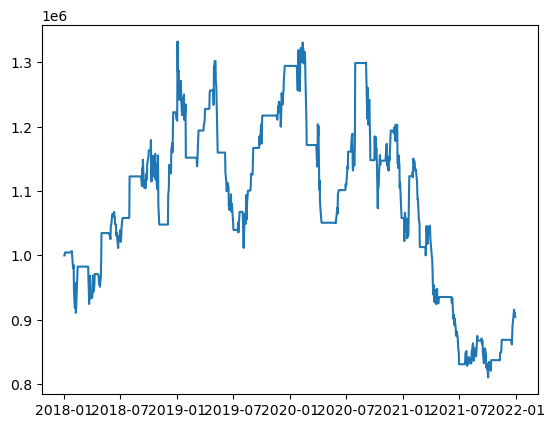

In [43]:
plt.plot(apple['portfolio value'])